# Pulsar Star Prediction

## Introduction

**Pulsar** *(from **pulsa**ting **r**adio source)* or Pulsar Stars are highly magnetic, rotating, compact heavenly bodies often viewed as flickering “stars” from the earth's night sky. Pulsar stars belong to the family of neutron stars which emit beams of electromagnetic radiation from their poles. Due to its high degree of rotation, the radiation from its poles appears to be pulsating or flickering from the earth, hence its name.

Pulsars are fantastic cosmic tools for scientists to study a wide range of phenomena. Scientists also use pulsars to study extreme states of matter, search for planets beyond Earth's solar system and measure cosmic distances[(Cofield, 2016.)](https://www.space.com/32661-pulsars.html). Pulsars also could help scientists find gravitational waves, which could point the way to energetic cosmic events like collisions between supermassive black holes.[(Buongiorno, C. ,2021)](https://astronomy.com/magazine/news/2021/10/neutron-stars-a-cosmic-gold-mine)

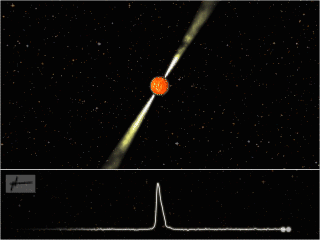

Image 1: Pulsar star rotating [(Astron)](https://www.astron.nl/pulsars/animations/)

The above image is a representation of how pulsars rotate rapidly, and how the electromagnetic beams from either pole point tangentially to their rotation path. As the pulsar rotates, these emission beams travel through the sky and are picked up by our telescopes in the form of integrated pulse profile curves. According to researchers, pulsar stars thus are identified by these repeated, periodic patterns of broadband radio emission produced as this beam crosses our line of sight. [(Mohamed, 2018.)](sciencedirect.com/science/article/pii/S2314728817300776).In addition, pulses may arrive at different times with ranging radio frequences. To address this DM-SNR curves (Dispersion Measure-Signal to Noise Ratio) are also computed accounting the uncertainties of the pulsar data.  

Studying these detectable radio emissions received by telescopes help us categorise if an observed emission is from a pulsar or not. Often disturbance and random noise are also picked up by our telescopes. Identifying if a given emission is noise or pulsar traditionally requires various computations by skilled astrophysicists. [(R. J. Lyon et al.)](https://doi.org/10.1093/mnras/stw656). This method is quite subjective and dependent upon how skilled and experienced the physicist is. Given that typically these telescopes transmit 140 gigabytes of data per week [(Dunbar, 2016)](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-the-hubble-space-telecope-58.html), studying all this data manually is extremely tedious and next to impossible. Thus, scientists have tried to solve these issues more creatively. They used existing data about pulsars to classify an unobserved reading through predictive algorithms [R. P. Eatough et al.](https://doi.org/10.1111/j.1365-2966.2010.17082.x).

Through this project, we aim to produce our own predictive classifier that will help us categorise if a given emission is a pulsar star or not. As we see this project relates to the binary classification problem.

#### Predictive Question

Can we use measurements of integrated pulse profile and DM-SNR reading from the telescope to predict if a given reading is from a pulsar star?

#### Dataset and its attributes

We will be using the [Predicting Pulsar Stars](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) dataset which collected potential pulsar candidates during the High Time Resolution Universe Survey [(Lyon, 2020.)](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate).
Each signal is described by eight continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (or integrated profile) and the remaining four variables are similarly obtained from the DM-SNR curve. These variables are:

Mean of the integrated profile.

Standard deviation of the integrated profile.

Excess kurtosis of the integrated profile.

Skewness of the integrated profile.

Mean of the DM-SNR curve.

Standard deviation of the DM-SNR curve.

Excess kurtosis of the DM-SNR curve.

Skewness of the DM-SNR curve.

target_class *(0 if it is not a pulsar star and 1 if it is a pulsar star)*


#### Variables of Intrest

In this exploration, we will forecast if an observation belongs to pulsar stars or some random noise. As described by [R. J. Lyon et al.](https://doi.org/10.1093/mnras/stw656), [R. P. Eatough et al.](https://doi.org/10.1111/j.1365-2966.2010.17082.x), measures of integrated profile and DM-SNR both play an integral and essential part in assessing whether a given recording is a pulsar or not. Studying the center of the curves of both integrated profile and DM-SNR can help us categorize if a given observation belongs to a pulsar star or not. Thus in our exploration, we will be studying the center of the curves of the integrated profile and DM-SNR which in our case is given by their respective means.

## Methods and Results

#### Reading data

In [1]:
# Initialize a pseudorandom number generator
# Introduce the packages
set.seed(4321)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Read data from Internet
url <- "https://raw.githubusercontent.com/Acha220/DSCI_Project_Proposal/main/pulsar_data_train.csv"
pulsar <- read_csv(url)

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



In [3]:
# See what the first part of the data looks like.
head(pulsar)

Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


In [4]:
# Rename columns
colnames(pulsar) <- c(
    "mean_profile", 
    "sd_profile", 
    "kurtosis_profile", 
    "skew_profile", 
    "mean_dmsnr", 
    "sd_dmsnr", 
    "kurtosis_dmsnr", 
    "skew_dmsnr", 
    "target_class"
)

In [5]:
# Convert numeric values into factor with numeric levels
pulsar <- pulsar %>%
mutate(target_class = as_factor(target_class))

In [6]:
pulsar <- pulsar %>%
select(mean_profile, mean_dmsnr, target_class)

In [7]:
# Split data into training data set and testing data set.
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

In [8]:
# See all of the columns
glimpse(pulsar_training)

Rows: 9,396
Columns: 3
$ mean_profile <dbl> 121.15625, 76.96875, 130.58594, 84.80469, 121.00781, 79.…
$ mean_dmsnr   <dbl> 3.1688963, 2.3996656, 2.7433110, 2.7901338, 2.0367893, 1…
$ target_class <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [9]:
# computing percentage of each class {percentage of observations which are pulsar and which are not pulsar}
num_obs <- nrow(pulsar_training)
pulsar_training %>%
  group_by(target_class) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

`summarise()` ungrouping output (override with `.groups` argument)



target_class,count,percentage
<fct>,<int>,<dbl>
0,8553,91.028097
1,843,8.971903


We notice at this point that only 9% of our training data is actually classfied as a pulsar star, the rest 91% is noise

In [10]:
# calculating number of rows with missing observations 
sum(is.na(pulsar_training))

[1] 0

here we notice that none of the observations have a missing mean of integrating profile and DM-SNR making them prime candidates for our data exploration

In [11]:
# computing means of each predictor 
mean_table <- select(pulsar_training, mean_profile:mean_dmsnr)  %>%
map_df(mean)
mean_table

mean_profile,mean_dmsnr
<dbl>,<dbl>
111.0663,12.80733


The means of the mean_profile and mean_dmsnr are approximately 111.0 and 12.5 respectively

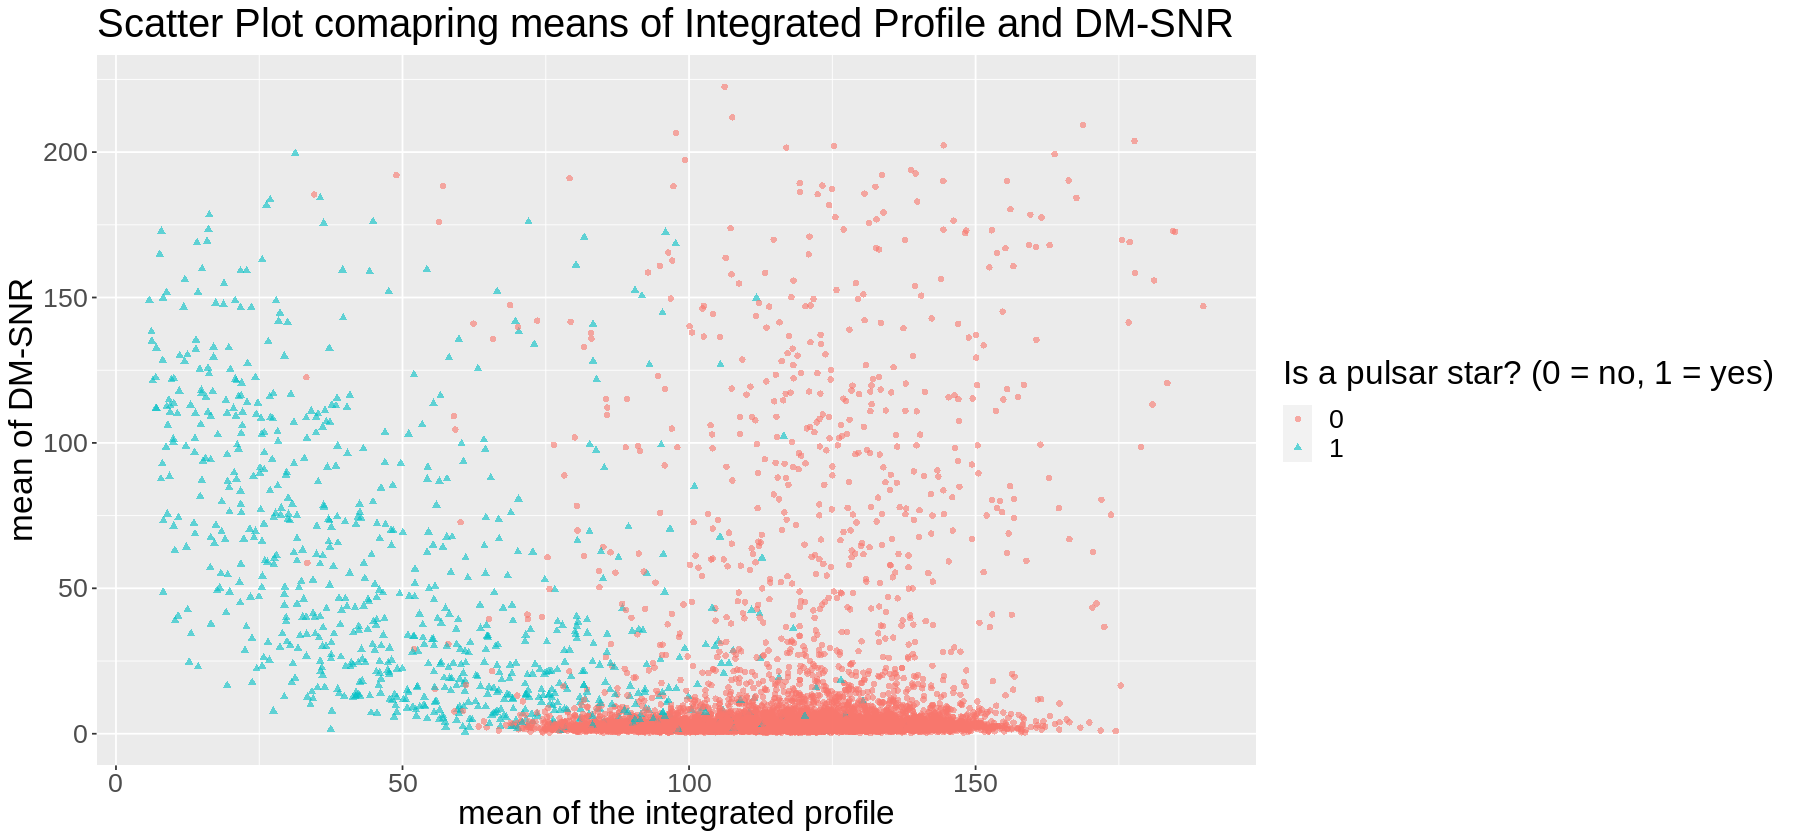

In [12]:
options(repr.plot.width = 15, repr.plot.height = 7) 
pulsar_training_plot <- pulsar_training %>%
ggplot(aes(x = mean_profile, y = mean_dmsnr, color = target_class, shape = target_class)) +
geom_point(alpha = 0.6)+
xlab("mean of the integrated profile") +
ylab("mean of DM-SNR") +
labs(title = "Scatter Plot comapring means of Integrated Profile and DM-SNR", colour = "Is a pulsar star? (0 = no, 1 = yes)", shape = "Is a pulsar star? (0 = no, 1 = yes)")+
theme(text = element_text(size = 20))
pulsar_training_plot

In [13]:
# Use recipe to clarify the target and predictors
pulsar_recipe <- recipe(target_class ~., data = pulsar) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors()) 
pulsar_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [14]:
# Create a model specification for K-nearest neighbors classification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% #weight_func = rectangular allows each neighbor to have 1 vote
    set_engine("kknn") %>%
    set_mode("classification")
knn_spec 

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [15]:
# Make a data frame for K values
k_vals <- tibble(neighbors = seq(from = 1, to = 20))

In [16]:
# Split the data with Cross-validation method
pulsar_vfold <- vfold_cv(pulsar, v = 5, strata = target_class)
 #5 or 10 usually. Higher fold = lower standard error = more computation = more time to run computer

In [17]:
# Fit the knn model
# Aggregate the mean and standard error of the classifier's validation accuracy
knn_results <- workflow() %>% 
add_recipe(pulsar_recipe) %>% 
add_model(knn_spec) %>% 
tune_grid(resamples = pulsar_vfold, grid = k_vals) %>% 
collect_metrics()

In [18]:
# Find accuracy
accuracies <- knn_results %>% 
filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9562580,5,0.0012716378,Model01
2,accuracy,binary,0.9562580,5,0.0012716378,Model02
3,accuracy,binary,0.9691089,5,0.0012230561,Model03
4,accuracy,binary,0.9691089,5,0.0012230561,Model04
5,accuracy,binary,0.9705458,5,0.0007941851,Model05
6,accuracy,binary,0.9705458,5,0.0007941851,Model06
7,accuracy,binary,0.9716633,5,0.0008096860,Model07
8,accuracy,binary,0.9716633,5,0.0008096860,Model08
9,accuracy,binary,0.9716632,5,0.0009378162,Model09


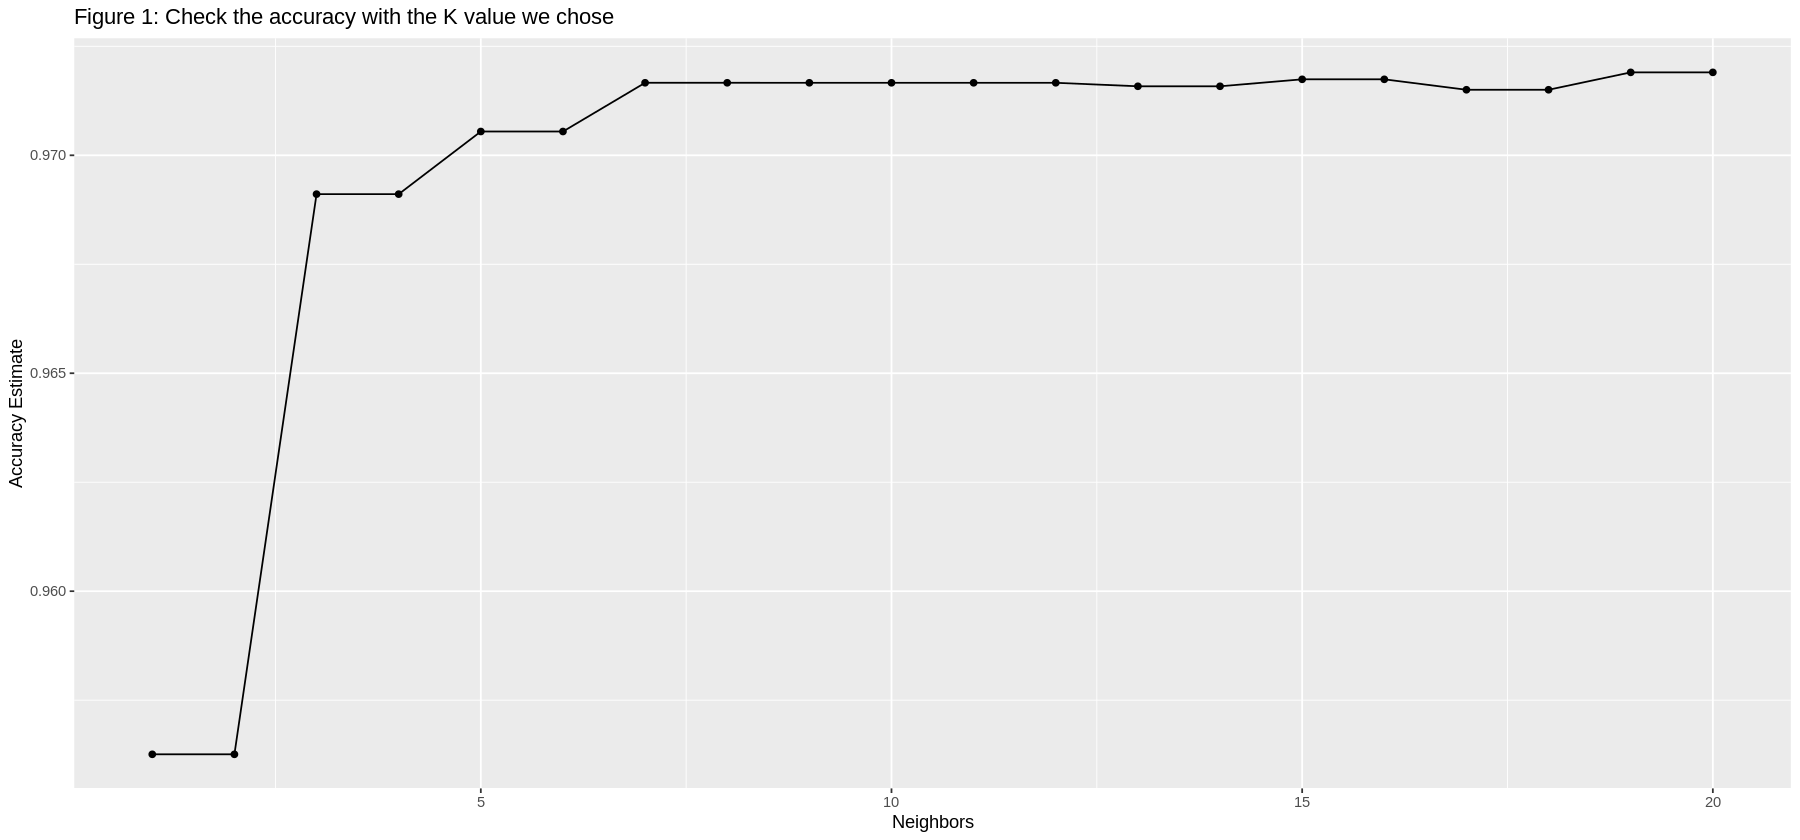

In [19]:
# Plot the accuracy and neighbors
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() + 
labs(x = "Neighbors", y = "Accuracy Estimate") +
ggtitle("Figure 1: Check the accuracy with the K value we chose")

accuracy_vs_k

We would like to select K = 7 as our nearest neighbors since the Accuracy Estimate only increases to a small extent with high numbers of K nearest neighbors.

In [20]:
# New model specification for the best parameter value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>% #weight_func = rectangular allows each neighbor to have 1 vote
    set_engine("kknn") %>%
    set_mode("classification")
knn_best_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 7
  weight_func = rectangular

Computational engine: kknn 


In [21]:
# Retrain the classifier with fit function
knn_best_fit <- workflow() %>% 
    add_recipe(pulsar_recipe) %>% 
    add_model(knn_best_spec) %>% 
    fit(data = pulsar_training)
knn_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~7, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02841635
Best kernel: rectangular
Best k: 7

In [22]:
# Predict with testing data
pulsar_test_predictions <- predict(knn_best_fit, pulsar_testing) %>% 
    bind_cols(pulsar_testing)


In [23]:
# Evaluate the estimated accuracy of the classifier
pulsar_metrics <- pulsar_test_predictions %>%
                metrics(truth = target_class, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
pulsar_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9709451


In [24]:
# Calculate cross-tabulation of observed and predicted classes
pulsar_conf_mat <- pulsar_test_predictions %>%
                    conf_mat(truth = target_class, estimate = .pred_class)
pulsar_conf_mat

          Truth
Prediction    0    1
         0 2809   78
         1   13  232

## Discussion

## References


Cofield, Calla. “What Are Pulsars?” Space.com, Space, 22 Apr. 2016, https://www.space.com/32661-pulsars.html. 

Dunbar, Brian. “What Is the Hubble Space Telescope?” NASA, NASA, 1 June 2015, https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-the-hubble-space-telecope-58.html. 

Florez, Alexander Ylnner Choquenaira, et al. "Machine Learning Pipeline for Pulsar Star Dataset." arXiv preprint arXiv:2005.01208 (2020), https://arxiv.org/pdf/2005.01208.pdf.

Lyon, Robert J., et al. "Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach." Monthly Notices of the Royal Astronomical Society 459.1 (2016): 1104-1123.

Lyon, Robert, and Pavan Raj. “Predicting Pulsar Star.” 25 Aug. 2020, https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate/metadata. 

Mohamed, T.M.: Pulsar selection using fuzzy knn classifier. Future Computing and Informatics Journal 3(1), 1 – 6 (2018).
https://doi.org/https://doi.org/10.1016/j.fcij.2017.11.001, http://www.
sciencedirect.com/science/article/pii/S2314728817300776

NASA. “Pulsar Star GIF NASA.” GIPHY, NASA, [https://media3.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif](https://media3.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif). Accessed 7 Dec. 2021. 
 

Witze, Alexandra. “NASA Test Proves Pulsars Can Function as a Celestial GPS.” Nature News, Nature Publishing Group, 11 Jan. 2018, www.nature.com/articles/d41586-018-00478-8





